In [1]:
import matplotlib.pyplot as plt
from itertools import combinations, permutations, chain, product
from math import factorial 
from random import randint

### Initial Thought: 

Solving with combinations: Build out distinct groupings of size `r` using:

$\binom{n}{r} = \frac{n!}{r!(n-r!)}$

Unfortunately, max size is 252 distinct groups with `r = 5`, so won't resolve problem (plot of distinct counts based on `r` shown below)

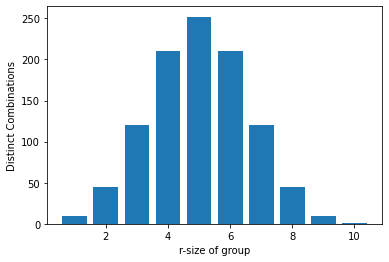

In [2]:
comb_list = []
prisoner_vals = range(1,11)
for n in prisoner_vals:
    comb_list.append(len(list(combinations(prisoner_vals, n))))

plt.bar(prisoner_vals, comb_list)  
plt.ylabel('Distinct Combinations')
plt.xlabel('r-size of group');

### Adding Sequential Component

- Given this problem includes a time component we can build sequences using ordered groupings (permutations)
    - example:
        - Person A drinks poison at 1 pm, Person B drinks poison at 1 pm and 1 second, Person C drinks poison at 1 pm and 2 seconds
        - Person A dies, then B, then C on the next day
        - This would mean the ingestion sequence must have been `A-B-C`, and not `A-C-B`, `B-C-A`, `B-A-C`, `C-A-B` or `C-B-A` (*adding order allows us to map a size `r=3` distinct sequence to 6 total ordered sequences, expanding distinct sequences overall - this of course expands as `r` grows*)
    
 Equation to build ordered sequences is:
 
 $\frac{n!}{(n-r!)}$
 
 - This means that a group of `A-B-C-D` counts as different from `D-C-B-A`, which should work given the time component. 

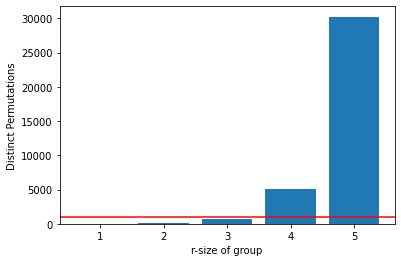

In [3]:
# empty list to store sequence
perm_list = []

# only going to consider 1 <= r <= 6
prisoner_vals = range(1,6)

# solve for total distinct sequences
for r in prisoner_vals:
    perm_list.append(factorial(10) / factorial(10-r))

# plot it, red line indicates what we need
plt.bar(prisoner_vals, perm_list)  
plt.ylabel('Distinct Permutations')
plt.xlabel('r-size of group')
plt.axhline(y=1000, color = 'r');

### Solution A:

- Can build ordered groups of size 4 and track sequence in which each wine is ingested for each group, then compare to sequence of deaths. 
- This would allow us to map `10 prisoners` to `5040 sequences` of prisoners (same as `10*9*8*7`, ensuring a prisoner is only represented once in a sequence)
- The translation would be something like as follows, where order of ingestion & order of death is critical to honing in on the Poison Wine:

| Wine Number | Sequence of Drink | Sequence of Death (if poisoned)
| --- | --- | --- | 
| 1 | A-B-C-D | A-B-C-D |
| 2 | B-A-C-D | B-A-C-D |
| 3 | A-B-D-C | A-B-D-C |
| 4 | A-C-B-D | A-C-B-D |
|...|...|...|
|1000 | J-I-A-C | J-I-A-C |

Comments:
- Critical point is that sequence of ingestion needs to be monitored for each wine bottle, and then sequence of death will be compared to the records on sequence of ingestion
- There are more subgroups that can be made than needed for 1000 bottles, so some will just be trashed. 

In [4]:
# randomly choose a bottle of wine to be poisonous
poisoned_wine = randint(1,1001)

# possible permutations from 10 distinct prisoners with r-size 4
l = list(permutations(range(1, 11), 4))
len(l)
print(f"Example of sequences: {l[:4]}")

print(f"Poison found in bottle {poisoned_wine}, which maps to sequence {l[poisoned_wine]}")

Example of sequences: [(1, 2, 3, 4), (1, 2, 3, 5), (1, 2, 3, 6), (1, 2, 3, 7)]
Poison found in bottle 425, which maps to sequence (1, 9, 6, 8)


### Solution B: 

- We have a problem where we need to map 10 elements -> 1000 distinct elements (can be ordered). 
- There is no need to have the same number of prisoners drink the same amount of wine:
    - giving the poison wine to 1,2 or even 3 prisoners will just result in 1,2, or 3 deaths, which is telling in itself.
- This means we could solve by the following simpler approach:
    - `10**3 = 1000`, so we have 3 spaces and 10 people to fill in those spaces to map from 10 prisoners -> 1000 bottles
    - We can provide a sip of each wine to 3 random prisoners, with replacement, spaced out in time
    - However, this approach is a bit ugly as you have to treat `A-A-B` and `A-B-A` as different scenarios 
        - This would have to be handled by an expected time lag for each ingestion of a wine (sip 1 of Wine A happens 2 seconds before sip 3 of Wine A and 1 second ebfore sip 2 of Wine A)
    - The benefit of this is approach is it reduces guaranteed death from 4 prisoners to 1-3 prisoners depending on sequence:
        - This allows the king to then wow his guests with additional creative executions at his party.
    
#### Example:
- Wine 1 -> Prisoner A, A, A  -> Death: Only Prisoner A dies (would only be dosed once)
- Wine 2 -> Prisoner A, A, B  -> Death: Prisoner A dies, followed by Prisoner B (2 seconds after A)
- Wine 3 -> Prisoner A, B, A  -> Death: Prisoner A dies (only dosed once), followed by Prisoner B (1 second after A)

`.....`

- Wine 1000 -> Prisoner J,J,J -> Death: Only Prisoner J dies

In [5]:
# python implementation
poisoned_wine = randint(1,1001)

# distinct groupings: Generate cartesian product over group of 10, 3 vals per group
groups = list(product(range(1,11), repeat=3))

print(f"Total distinct groups: {len(groups)}")
print(f"Example of sequences: {groups[:4]}")

print(f"Poison found in bottle {poisoned_wine}, which maps to sequence {groups[poisoned_wine]}")

Total distinct groups: 1000
Example of sequences: [(1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4)]
Poison found in bottle 749, which maps to sequence (8, 5, 10)
